<a href="https://colab.research.google.com/github/Smchavan491/Data-Science-Practicals/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/heart_disease.csv")

#1) Data Cleaning

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(920, 16)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.isnull()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
mean_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
mode_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

for col in mean_columns:
  df[col].fillna(df[col].mean, inplace=True)

for col in mode_columns:
  df[col].fillna(df[col].mode()[0], inplace = True)

<ipython-input-14-227a00c83d13>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
915    127.0
916      NaN
917    122.0
918      NaN
919    120.0
Name: trestbps, Length: 920, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(df[col].mean, inplace=True)
<ipython-input-14-227a00c83d13>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0      233.0
1      286.0
2      229.0
3      250.0
4      204.0
       ...  
915    333.0
916    139.0
917    223.0
918    385.0
919    254.0
Name: chol, Length: 920, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna(

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


#2) Data Integration

In [ ]:
# Step 1: Ensure "chol" is numeric
df["chol"] = pd.to_numeric(df["chol"], errors="coerce")

# Step 2: Calculate mean cholesterol per age
age_chol = df.groupby("age")["chol"].mean().reset_index()
age_chol.columns = ["age", "avg_chol"]

# Step 3: Merge back into original data
merged_df = df.merge(age_chol, on="age", how="left")

# Step 4: Print result
print(merged_df[["age", "avg_chol"]].head())

   age    avg_chol
0   63  157.600000
1   67  254.866667
2   67  254.866667
3   37  233.727273
4   41  216.500000


In [ ]:
has_disease = df[df["num"] > 0]
no_disease = df[df["num"] == 0]

concat_df = pd.concat([has_disease, no_disease])

print(concat_df[["age", "num"]].head())

   age  num
1   67    2
2   67    1
6   62    3
8   63    2
9   53    1


In [ ]:
col_name = ['chol','thalch','oldpeak','trestbps','ca']

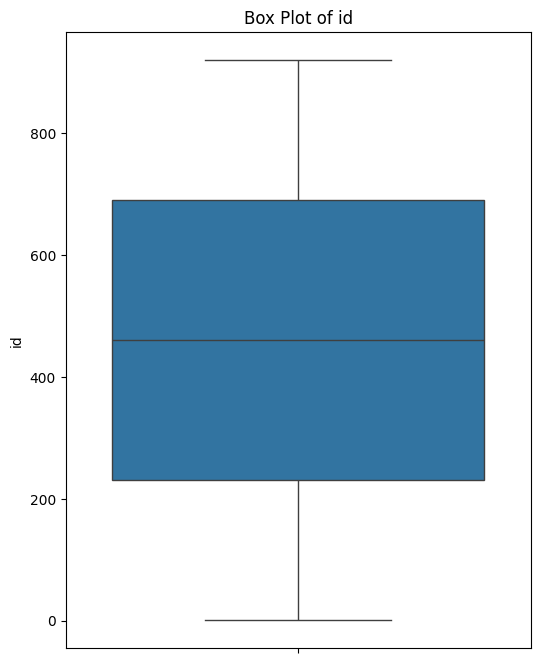

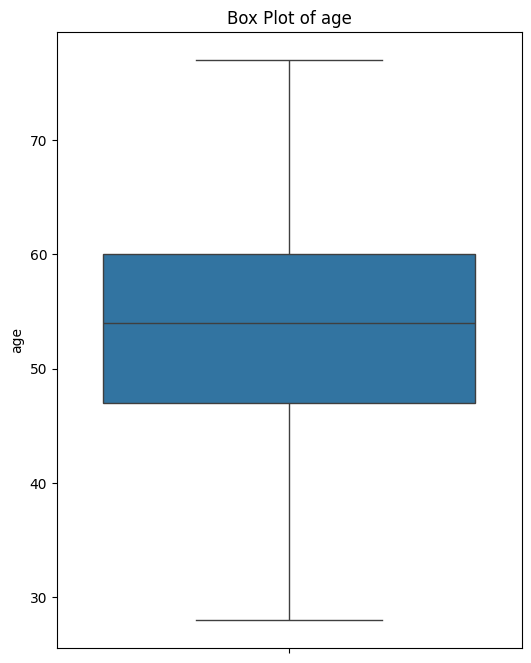

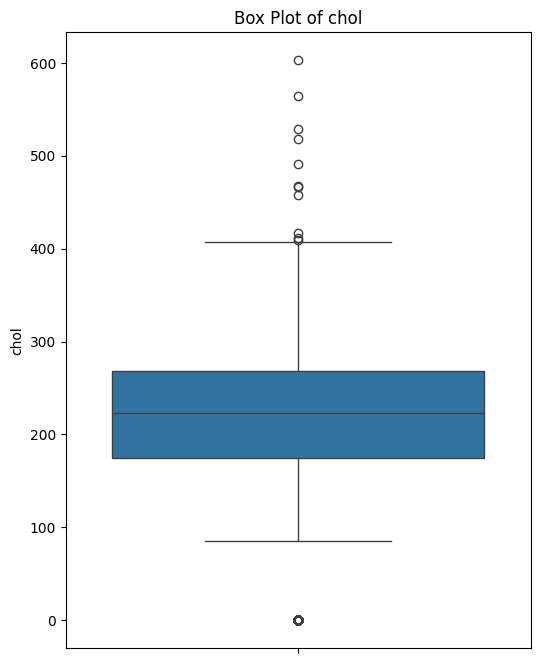

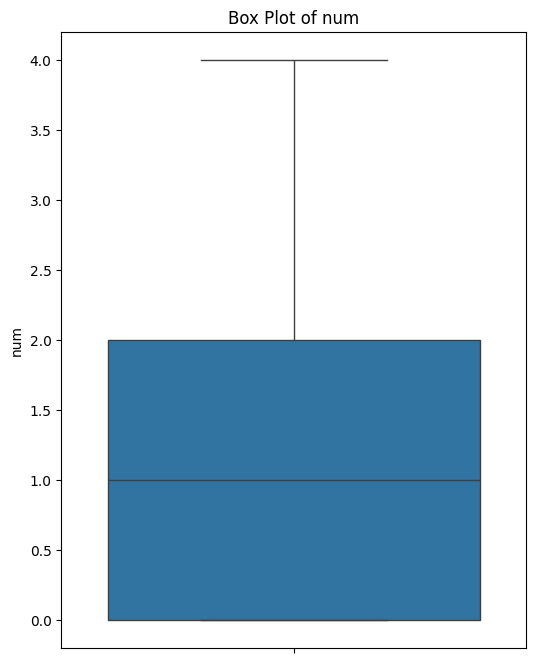

In [ ]:
# Automatically select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 8))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

In [ ]:
def remove_outliers(column):
  Q1 = column.quantile(0.25)
  Q2 = column.quantile(0.75)
  IQR = Q2 - Q3
  threshold = 2.0*IQR
  outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
  return column[~outlier_mask]

In [ ]:
for col in numeric_cols:
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna().sum()
    print(f"{col}: {non_numeric} non-numeric values")

id: 0 non-numeric values
age: 0 non-numeric values
chol: 30 non-numeric values
num: 0 non-numeric values
